In [116]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pickle

In [117]:
time_path = '_Jan_1w'

train_path = 'final2/Training/train_engineered_cleaned_merged_flights'
vali_path = 'final2/Validation/vali_engineered_cleaned_merged_flights'
test_path = 'final2/Testing/test_engineered_cleaned_merged_flights'

In [118]:
df_train = pd.read_csv(train_path + time_path + '.csv')
df_vali = pd.read_csv(vali_path + time_path + '.csv')
df_test = pd.read_csv(test_path + time_path + '.csv')

In [119]:
df_vali.rename(columns={'dep_delay': 'DelayD_carrier'}, inplace=True)
df_test.rename(columns={'dep_delay': 'DelayD_carrier', 'arr_delay': 'DelayA_carrier'}, inplace=True)

In [120]:
df_vali['delay'] = pd.Series([x if (x > 15) else 0 for x in df_vali['arr_delay']])
df_vali['delayed'] = pd.Series([0 if (x <= 0) else 1 for x in df_vali['arr_delay']])

In [121]:
df_train.columns[df_train.isnull().any()]

Index([], dtype='object')

In [122]:
df_vali.columns[df_vali.isnull().any()]

Index(['DelayA_origin_hourly', 'DelayA_carrier_hourly', 'DelayD_origin_hourly',
       'DelayD_carrier_hourly'],
      dtype='object')

In [123]:
df_test.columns[df_test.isnull().any()]

Index(['DelayD_origin', 'DelayD_dest', 'DelayA_origin', 'DelayA_dest',
       'DelayA_origin_hourly', 'DelayA_carrier_hourly', 'DelayD_origin_hourly',
       'DelayD_carrier_hourly'],
      dtype='object')

In [124]:
df_vali.shape

(96233, 79)

In [125]:
df_vali.dropna(axis=0, inplace=True)
df_vali.shape

(96119, 79)

## Coloumn Drop

In [126]:
train_vali_diff = df_train.columns.difference(df_vali.columns).to_list()
vali_train_diff = df_vali.columns.difference(df_train.columns).to_list()

In [127]:
train_vali_diff

['arr_time',
 'arr_time_hour',
 'arr_time_min',
 'cos_arr_time',
 'cos_dep_time',
 'dep_delay',
 'dep_time',
 'dep_time_hour',
 'dep_time_min',
 'late_aircraft_delay',
 'sin_arr_time',
 'sin_dep_time',
 'weather_delay']

In [128]:
vali_train_diff

[]

In [129]:
df_train = df_train.drop(train_vali_diff, axis=1)

In [130]:
vali_test_diff = df_vali.columns.difference(df_test.columns).to_list()
test_vali_diff = df_test.columns.difference(df_vali.columns).to_list()

In [131]:
vali_test_diff

['arr_delay',
 'delay',
 'delayed',
 'man_Aerospatiale/alenia',
 'man_Air Tractor Inc',
 'man_Avions De Transport Regional',
 'man_Benham John',
 'man_Cessna',
 'man_Cirrus Design Corp',
 'man_Dassault',
 'man_De Havilland Canada',
 'man_Diamond Aircraft Ind Gmbh',
 'man_Ela Aviacion',
 'man_Gulfstream Aerospace',
 'man_Mooney Aircraft Corp.',
 'man_Pilatus',
 'man_Quest Aircraft Company Llc',
 'man_Robinson Helicopter Co',
 'man_Saab',
 'man_Socata',
 'man_Tremble Jason M']

In [132]:
test_vali_diff

['man_C Series Aircraft Ltd Ptnrsp']

In [133]:
df_test.drop('man_C Series Aircraft Ltd Ptnrsp', inplace=True, axis=1)
df_train.drop(vali_test_diff[3:], inplace=True, axis=1)
df_vali.drop(vali_test_diff[3:], inplace=True, axis=1)

In [134]:
for diff in [df_train.columns.difference(df_vali.columns).to_list(), 
             df_vali.columns.difference(df_train.columns).to_list(),
             df_vali.columns.difference(df_test.columns).to_list(),
             df_test.columns.difference(df_vali.columns).to_list()]:
    print(diff)

[]
[]
['arr_delay', 'delay', 'delayed']
[]


In [135]:
df_train.columns

Index(['fl_date', 'op_unique_carrier', 'origin', 'dest', 'crs_dep_time',
       'crs_arr_time', 'arr_delay', 'distance', 'numflights', 'numstrikes',
       'strikeprob', 'percentflights', 'region_N', 'region_O', 'region_S',
       'region_W', 'man_Airbus', 'man_American Champion Aircraft',
       'man_Bell Helicopter Textron Canada', 'man_Boeing', 'man_Bombardier',
       'man_Canadair', 'man_Eads/alenia Atr', 'man_Embraer', 'man_Grumman',
       'man_Mcdonnell Douglas', 'man_Piper', 'aircraft_age',
       'type_large_airport', 'type_medium_airport', 'type_small_airport',
       'date', 'weekday', 'sin_weekday', 'cos_weekday', 'crs_dep_time_hour',
       'crs_dep_time_min', 'sin_crs_dep_time', 'cos_crs_dep_time',
       'crs_arr_time_hour', 'crs_arr_time_min', 'sin_crs_arr_time',
       'cos_crs_arr_time', 'delayed', 'delay', 'DelayD_carrier',
       'num_flights_carrier', 'DelayD_origin', 'num_flights_origin',
       'DelayD_dest', 'num_flights_dest', 'DelayA_carrier', 'DelayA_origin'

In [136]:
df_train[['arr_delay', 'distance', 'numflights', 'numstrikes',
       'strikeprob', 'percentflights', 'aircraft_age',
       'date', 'weekday', 'sin_weekday', 'cos_weekday', 'crs_dep_time_hour',
       'crs_dep_time_min', 'sin_crs_dep_time', 'cos_crs_dep_time',
       'crs_arr_time_hour', 'crs_arr_time_min', 'sin_crs_arr_time',
       'cos_crs_arr_time', 'DelayD_carrier', 'num_flights_carrier',
       'DelayD_origin', 'num_flights_origin', 'DelayD_dest',
       'num_flights_dest', 'DelayA_carrier', 'DelayA_origin', 'DelayA_dest',
       'DelayA_hourly', 'num_flights_hourly', 'DelayD_hourly',
       'DelayA_origin_hourly', 'DelayA_carrier_hourly', 'DelayD_origin_hourly',
       'DelayD_carrier_hourly']].describe().loc[['min','max']].T

,min,max
arr_delay,-8.200000e+02,1778.000000
distance,3.100000e+01,4983.000000
numflights,2.000000e+00,790253.000000
numstrikes,0.000000e+00,3799.000000
strikeprob,0.000000e+00,0.086329
percentflights,1.250634e-07,0.049416
aircraft_age,1.000000e+00,40.000000
date,1.000000e+00,8.000000
weekday,0.000000e+00,6.000000
sin_weekday,-9.589243e-01,0.909297


In [137]:
exclude_cols = ['fl_date', 'op_unique_carrier', 'origin', 'dest', 'crs_dep_time', 'crs_arr_time']

In [138]:
df_train.drop(exclude_cols, inplace=True, axis=1)
df_vali.drop(exclude_cols, inplace=True, axis=1)
df_test.drop(exclude_cols, inplace=True, axis=1)

In [139]:
df_train.columns

Index(['arr_delay', 'distance', 'numflights', 'numstrikes', 'strikeprob',
       'percentflights', 'region_N', 'region_O', 'region_S', 'region_W',
       'man_Airbus', 'man_American Champion Aircraft',
       'man_Bell Helicopter Textron Canada', 'man_Boeing', 'man_Bombardier',
       'man_Canadair', 'man_Eads/alenia Atr', 'man_Embraer', 'man_Grumman',
       'man_Mcdonnell Douglas', 'man_Piper', 'aircraft_age',
       'type_large_airport', 'type_medium_airport', 'type_small_airport',
       'date', 'weekday', 'sin_weekday', 'cos_weekday', 'crs_dep_time_hour',
       'crs_dep_time_min', 'sin_crs_dep_time', 'cos_crs_dep_time',
       'crs_arr_time_hour', 'crs_arr_time_min', 'sin_crs_arr_time',
       'cos_crs_arr_time', 'delayed', 'delay', 'DelayD_carrier',
       'num_flights_carrier', 'DelayD_origin', 'num_flights_origin',
       'DelayD_dest', 'num_flights_dest', 'DelayA_carrier', 'DelayA_origin',
       'DelayA_dest', 'DelayA_hourly', 'num_flights_hourly', 'DelayD_hourly',
       'D

## Standardize data

In [140]:
from sklearn.preprocessing import StandardScaler

In [141]:
# num_cols_with_weekday = [ 'distance', 'numflights', 'numstrikes', 'strikeprob',
#        'percentflights', 'aircraft_age',
#        'date', 'weekday', 'sin_weekday', 'cos_weekday', 'crs_dep_time_hour',
#        'crs_dep_time_min', 'sin_crs_dep_time', 'cos_crs_dep_time',
#        'crs_arr_time_hour', 'crs_arr_time_min', 'sin_crs_arr_time',
#        'cos_crs_arr_time', 'DelayD_carrier', 'num_flights_carrier',
#        'DelayD_origin', 'num_flights_origin', 'DelayD_dest',
#        'num_flights_dest', 'DelayA_carrier', 'DelayA_origin', 'DelayA_dest',
#        'DelayA_hourly', 'num_flights_hourly', 'DelayD_hourly',
#        'DelayA_origin_hourly', 'DelayA_carrier_hourly', 'DelayD_origin_hourly',
#        'DelayD_carrier_hourly']

In [142]:
def standardize(X):
    num_cols = [ 'distance', 'numflights', 'numstrikes', 'strikeprob',
       'percentflights', 'aircraft_age',
       'date', 'sin_weekday', 'cos_weekday', 'crs_dep_time_hour',
       'crs_dep_time_min', 'sin_crs_dep_time', 'cos_crs_dep_time',
       'crs_arr_time_hour', 'crs_arr_time_min', 'sin_crs_arr_time',
       'cos_crs_arr_time', 'DelayD_carrier', 'num_flights_carrier',
       'DelayD_origin', 'num_flights_origin', 'DelayD_dest',
       'num_flights_dest', 'DelayA_carrier', 'DelayA_origin', 'DelayA_dest',
       'DelayA_hourly', 'num_flights_hourly', 'DelayD_hourly',
       'DelayA_origin_hourly', 'DelayA_carrier_hourly', 'DelayD_origin_hourly',
       'DelayD_carrier_hourly']
    std_scaler = StandardScaler()
    X[num_cols] = std_scaler.fit_transform(X[num_cols])
    
    return X

## Drop high correlated features

In [143]:
def drop_colinearity(X_train, X_vali):
    # create correlation matrix

    X_traincorr = X_train.corr().abs()

    # iterate thru and find pairs with correlation > 0.5

    trainindices = np.where(X_traincorr > 0.5) 
    trainindices = [(X_traincorr.index[x], X_traincorr.columns[y]) 
    for x, y in zip(*trainindices)
        if x != y and x < y]

    # drop pairs found in last step

    for idx in trainindices: #each pair
        try:
            X_train.drop(idx[1], axis = 1, inplace=True)
            X_vali.drop(idx[1], axis = 1, inplace=True)
        except KeyError:
            pass

    return X_train, X_vali

## Feature Selection

In [144]:
from sklearn.feature_selection import f_regression, SelectKBest

In [145]:
def select_top10(X, y):
    '''
    Input: X, y
    Return: top 10 best features of X using selectKBest and 10 feature names
    '''
    select10 = SelectKBest(f_regression, k=10)
    select10.fit(X, y)
    col_names = X.columns[select10.get_support()]
    print(f'top 10 best features are:\n {col_names}')
    X_top_10 = pd.DataFrame(select10.transform(X), columns=col_names)
    
    return X_top_10, col_names

## Creating data

In [146]:
# Drop outliers
cols_tr = [col for col in df_train.columns if df_train[col].std() != 0]
cols_va = [col for col in df_vali.columns if df_vali[col].std() != 0]
df_train[cols_tr] = df_train[cols_tr].mask((df_train[cols_tr]  - df_train[cols_tr].mean()).abs() > 3 * df_train[cols_tr].std())
df_vali[cols_va] = df_vali[cols_va].mask((df_vali[cols_va]  - df_vali[cols_va].mean()).abs() > 3 * df_vali[cols_va].std())
df_train.dropna(inplace=True)
df_vali.dropna(inplace=True)

In [147]:
# For prediction 'arr_delay'
y_train = df_train['arr_delay']
X_train = df_train.drop(['arr_delay', 'delay', 'delayed'], axis=1)
y_vali = df_vali['arr_delay']
X_vali = df_vali.drop(['arr_delay', 'delay', 'delayed'], axis=1)

In [148]:
# For predicting 'delay'
# y_train = df_train['delay']
# X_train = df_train.drop(['arr_delay', 'delay', 'delayed'], axis=1)
# y_vali = df_vali['delay']
# X_vali = df_vali.drop(['arr_delay', 'delay', 'delayed'], axis=1)

In [149]:
# Drop 'weekday'
X_train.drop('weekday', inplace=True, axis=1)
X_vali.drop('weekday', inplace=True, axis=1)

In [150]:
X_train_std = standardize(X_train)
X_vali_std = standardize(X_vali)

X_train_std, X_vali_std = drop_colinearity(X_train_std, X_vali_std)

X_train_std_10, top10_features = select_top10(X_train_std, y_train)
X_vali_std_10 = X_vali_std[top10_features]

top 10 best features are:
 Index(['distance', 'numflights', 'date', 'sin_weekday', 'cos_weekday',
       'crs_dep_time_hour', 'DelayD_carrier', 'DelayD_origin', 'DelayD_dest',
       'num_flights_dest'],
      dtype='object')


C:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression

In [234]:
lr_reg = LinearRegression()

In [235]:
lr_reg.fit(X_train_std_10, y_train)

LinearRegression()

In [236]:
filename = 'linear_regression'
pickle.dump(lr_reg, open(filename + time_path + '.sav', 'wb'))

In [237]:
y_pred_lr = lr_reg.predict(X_vali_std_10)

In [238]:
print(f'MAE: {mean_absolute_error(y_vali, y_pred_lr)}')
print(f'RMSE: {mean_squared_error(y_vali, y_pred_lr, squared=False)}')
print(f'R2 score: {r2_score(y_vali, y_pred_lr)}')

MAE: 19.145747761966067
RMSE: 28.401320198919926
R2 score: 0.0314140756717356


## Ridge Regression

In [338]:
from sklearn.linear_model import Ridge

In [328]:
params = {
    'alpha': np.arange(525, 526, 0.01)
}

In [329]:
ridge_reg = Ridge()
ridge_gridsearch = GridSearchCV(ridge_reg, param_grid=params_ridge, cv=10)

In [330]:
ridge_gridsearch.fit(X_train_std_10, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([525.  , 525.01, 525.02, 525.03, 525.04, 525.05, 525.06, 525.07,
       525.08, 525.09, 525.1 , 525.11, 525.12, 525.13, 525.14, 525.15,
       525.16, 525.17, 525.18, 525.19, 525.2 , 525.21, 525.22, 525.23,
       525.24, 525.25, 525.26, 525.27, 525.28, 525.29, 525.3 , 525.31,
       525.32, 525.33, 525.34, 525.35, 525.36, 525.37, 525.38, 525.39,
       525.4 , 525.4...
       525.48, 525.49, 525.5 , 525.51, 525.52, 525.53, 525.54, 525.55,
       525.56, 525.57, 525.58, 525.59, 525.6 , 525.61, 525.62, 525.63,
       525.64, 525.65, 525.66, 525.67, 525.68, 525.69, 525.7 , 525.71,
       525.72, 525.73, 525.74, 525.75, 525.76, 525.77, 525.78, 525.79,
       525.8 , 525.81, 525.82, 525.83, 525.84, 525.85, 525.86, 525.87,
       525.88, 525.89, 525.9 , 525.91, 525.92, 525.93, 525.94, 525.95,
       525.96, 525.97, 525.98, 525.99])})

In [331]:
ridge_gridsearch.best_params_

{'alpha': 525.9899999999991}

In [332]:
filename = 'ridge_regression'
pickle.dump(ridge_gridsearch, open(filename + time_path + '.sav', 'wb'))

In [333]:
y_pred_ridge = ridge_gridsearch.predict(X_vali_std_10)

#### Performace evaluation

In [334]:
print(f'MAE: {mean_absolute_error(y_vali, y_pred_ridge)}')
print(f'RMSE: {mean_squared_error(y_vali, y_pred_ridge, squared=False)}')
print(f'R2 score: {r2_score(y_vali, y_pred_ridge)}')

MAE: 19.145380389086384
RMSE: 28.401372179171233
R2 score: 0.03141053024599605


## Lasso Regression

In [239]:
from sklearn.linear_model import Lasso

In [240]:
las_reg = Lasso()

In [241]:
params = {
    'alpha': [0.5, 1, 10, 100]
}

In [242]:
las_gridsearch = GridSearchCV(las_reg, param_grid=params, cv=10)

In [243]:
las_gridsearch.fit(X_train_std_10, y_train)

GridSearchCV(cv=10, estimator=Lasso(), param_grid={'alpha': [0.5, 1, 10, 100]})

In [244]:
las_gridsearch.best_params_

{'alpha': 0.5}

In [247]:
filename = 'lasso_regression'
pickle.dump(las_gridsearch, open(filename + time_path + '.sav', 'wb'))

In [245]:
y_pred_las = las_gridsearch.predict(X_vali_std_10)

In [246]:
print(f'MAE: {mean_absolute_error(y_vali, y_pred_las)}')
print(f'RMSE: {mean_squared_error(y_vali, y_pred_las, squared=False)}')
print(f'R2 score: {r2_score(y_vali, y_pred_las)}')

MAE: 19.133227413860066
RMSE: 28.43861424683089
R2 score: 0.028868686513075614


## Polynomial Regression/Transformation with linear regression

In [248]:
from sklearn.preprocessing import PolynomialFeatures

In [305]:
X_train_std_4_poly = PolynomialFeatures().fit_transform(X_train_std_10.iloc[:, :4])
X_vali_std_4_poly = PolynomialFeatures().fit_transform(X_vali_std_10.iloc[:, :4])

In [306]:
polylr_reg = LinearRegression()

In [307]:
polylr_reg.fit(X_train_std_4_poly, y_train)

LinearRegression()

In [308]:
filename = 'poly_linear_regression'
pickle.dump(polylr_reg, open(filename + time_path + '.sav', 'wb'))

In [309]:
y_pred_polylr = polylr_reg.predict(X_vali_std_4_poly)

In [310]:
print(f'MAE: {mean_absolute_error(y_vali, y_pred_polylr)}')
print(f'RMSE: {mean_squared_error(y_vali, y_pred_polylr, squared=False)}')
print(f'R2 score: {r2_score(y_vali, y_pred_polylr)}')

MAE: 19.292154860597506
RMSE: 28.626224510623114
R2 score: 0.01601326604758413


## LinearSVR

In [311]:
from sklearn import svm

In [322]:
lrsvr = svm.LinearSVR()

In [323]:
lrsvr.fit(X_train_std_10, y_train)

LinearSVR()

In [326]:
filename = 'linearSVR_regression'
pickle.dump(lrsvr, open(filename + time_path + '.sav', 'wb'))

In [324]:
y_pred_lrsvr = lrsvr.predict(X_vali_std_10)

In [345]:
print(f'MAE: {mean_absolute_error(y_vali, y_pred_lrsvr)}')
print(f'RMSE: {mean_squared_error(y_vali, y_pred_lrsvr, squared=False)}')
print(f'R2 score: {r2_score(y_vali, y_pred_lrsvr)}')

MAE: 18.09992208224646
RMSE: 29.29129052885769
R2 score: -0.03023929396636471


## SGD Regression

In [149]:
from sklearn.linear_model import SGDRegressor

In [153]:
sgd_reg = SGDRegressor(learning_rate='optimal')

In [192]:
params =  {
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'alpha': [0.05, 0.1, 0.15],
    'max_iter': [800, 1000, 1500],
    'epsilon': [0.05, 0.1, 0.15]
}

In [193]:
sgd_gridsearch = GridSearchCV(sgd_reg, param_grid=params, cv=10)

In [194]:
sgd_gridsearch.fit(X_train_std_10, y_train)

GridSearchCV(cv=10, estimator=SGDRegressor(learning_rate='optimal'),
             param_grid={'alpha': [0.05, 0.1, 0.15],
                         'epsilon': [0.05, 0.1, 0.15],
                         'loss': ['squared_loss', 'huber',
                                  'epsilon_insensitive',
                                  'squared_epsilon_insensitive'],
                         'max_iter': [800, 1000, 1500]})

In [195]:
sgd_gridsearch.best_params_

{'alpha': 0.05,
 'epsilon': 0.05,
 'loss': 'squared_epsilon_insensitive',
 'max_iter': 1500}

In [231]:
filename = 'sgd_regression'
pickle.dump(sgd_gridsearch, open(filename + time_path + '.sav', 'wb'))

In [196]:
y_pred_sgd = sgd_gridsearch.predict(X_vali_std_10)

In [197]:
print(f'MAE: {mean_absolute_error(y_vali, y_pred_sgd)}')
print(f'RMSE: {mean_squared_error(y_vali, y_pred_sgd, squared=False)}')
print(f'R2 score: {r2_score(y_vali, y_pred_sgd)}')

MAE: 19.150558524368897
RMSE: 28.40226558759485
R2 score: 0.03134959237325996


## XGBoosting

In [54]:
!pip install xgboost

In [55]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [183]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror')

In [184]:
# Some of the hyperparameters have already been narrowed down to a smaller range/value.
params_xgb = {
    'colsample_bytree': [0.3, 0.5],
    'learning_rate': [0.17, 0.18, 0.19],
    'max_depth': [11],
    'alpha': [5],
    'n_estimators': [80, 100, 120]
}

In [185]:
xgb_gridsearch = GridSearchCV(xg_reg, param_grid=params_xgb, cv=10)

In [186]:
xgb_gridsearch.fit(X_train_std_10, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
      

In [187]:
xgb_gridsearch.best_params_

{'alpha': 5,
 'colsample_bytree': 0.5,
 'learning_rate': 0.17,
 'max_depth': 11,
 'n_estimators': 80}

In [230]:
filename = 'xgb_regression'
pickle.dump(xgb_gridsearch, open(filename + time_path + '.sav', 'wb'))

In [188]:
y_pred_xgb = xgb_gridsearch.predict(X_vali_std_10)

In [189]:
print(f'MAE: {mean_absolute_error(y_vali, y_pred_xgb)}')
print(f'RMSE: {mean_squared_error(y_vali, y_pred_xgb, squared=False)}')
print(f'R2 score: {r2_score(y_vali, y_pred_xgb)}')

MAE: 17.600762144812364
RMSE: 26.478695264326575
R2 score: 0.15811211457172802


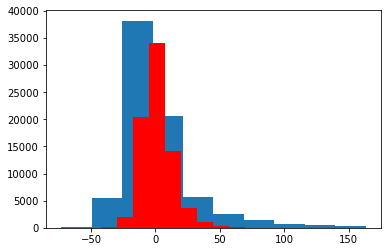

In [190]:
plt.hist(y_vali)
plt.hist(y_pred_xgb, color='red')
plt.show()

## Random Forest Regression (long training time ~5hrs)

In [198]:
from sklearn.ensemble import RandomForestRegressor

In [199]:
rf_reg = RandomForestRegressor()

In [219]:
params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20],
    'max_features': [0.5, 0.8, 'auto'],
    'min_samples_leaf': [1, 10, 50]
}

In [220]:
rf_gridsearch = GridSearchCV(rf_reg, param_grid=params, cv=10)

In [221]:
rf_gridsearch.fit(X_train_std_10, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 20],
                         'max_features': [0.5, 0.8, 'auto'],
                         'min_samples_leaf': [1, 10, 50],
                         'n_estimators': [50, 100, 150]})

In [222]:
rf_gridsearch.best_params_

{'max_depth': 20,
 'max_features': 0.8,
 'min_samples_leaf': 10,
 'n_estimators': 150}

In [232]:
filename = 'random_forest_regression'
pickle.dump(rf_gridsearch, open(filename + time_path + '.sav', 'wb'))

In [223]:
y_pred_rf = rf_gridsearch.predict(X_vali_std_10)

In [224]:
print(f'MAE: {mean_absolute_error(y_vali, y_pred_rf)}')
print(f'RMSE: {mean_squared_error(y_vali, y_pred_rf, squared=False)}')
print(f'R2 score: {r2_score(y_vali, y_pred_rf)}')

MAE: 17.40117342876584
RMSE: 26.260777417356753
R2 score: 0.17191245118873877


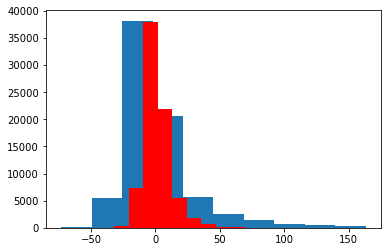

In [226]:
plt.hist(y_vali)
plt.hist(y_pred_rf, color='red')
plt.show()

## Performance summary

In [348]:
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Polynomial Regression', 'LinearSVR', 'SGD Regression', 'XGBoost Regression', 'Random Forest Regression']

In [349]:
y_pred_lst = [y_pred_lr, y_pred_ridge, y_pred_las, y_pred_polylr, y_pred_lrsvr, y_pred_sgd, y_pred_xgb, y_pred_rf]

In [362]:
Evaluation_df = pd.DataFrame({'MAE': [float("{:.2f}".format(mean_absolute_error(y_vali, pred))) for pred in y_pred_lst], 
              'RMSE': [float("{:.2f}".format(mean_squared_error(y_vali, pred, squared=False))) for pred in y_pred_lst], 
              'R2_Score': [float("{:.2f}".format(r2_score(y_vali, pred))) for pred in y_pred_lst]}, index=models)

In [363]:
Evaluation_df = Evaluation_df.sort_values(by='R2_Score', ascending=False)
Evaluation_df

,MAE,RMSE,R2_Score
Random Forest Regression,17.40,26.26,0.17
XGBoost Regression,17.60,26.48,0.16
Linear Regression,19.15,28.40,0.03
Ridge Regression,19.15,28.40,0.03
Lasso Regression,19.13,28.44,0.03
SGD Regression,19.15,28.40,0.03
Polynomial Regression,19.29,28.63,0.02
LinearSVR,18.10,29.29,-0.03


In [355]:
Evaluation_df.to_csv('evaluation_summary' + time_path + '.csv')

In [37]:
# Load train
lr_trained = pickle.load(open('linear_regression'+time_path+'.sav', 'rb'))
ridge_trained = pickle.load(open('ridge_regression'+time_path+'.sav', 'rb'))
lasso_trained = pickle.load(open('lasso_regression'+time_path+'.sav', 'rb'))
poly_trained = pickle.load(open('poly_linear_regression'+time_path+'.sav', 'rb'))
lrSVR_trained = pickle.load(open('linearSVR_regression'+time_path+'.sav', 'rb'))
sgd_trained = pickle.load(open('sgd_regression'+time_path+'.sav', 'rb'))
xgb_trained = pickle.load(open('xgb_regression'+time_path+'.sav', 'rb'))
rf_trained = pickle.load(open('random_forest_regression'+time_path+'.sav', 'rb'))

In [38]:
from sklearn.model_selection import learning_curve

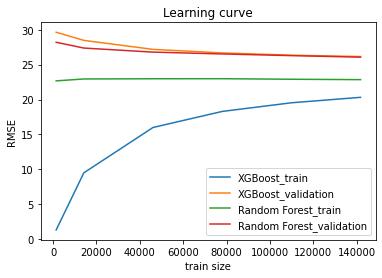

In [82]:
# PLotting learning curves for best 2 performed models
names = {
    xgb_trained: 'XGBoost',
    rf_trained: 'Random Forest'
}

train_sizes = np.concatenate(([0.01], np.linspace(0.1, 1.0, 5)))
for i in [xgb_trained, rf_trained]:
    (train_sizes,
     train_scores,
     test_scores) = learning_curve(i.best_estimator_, X_train_std_10, y_train, n_jobs=4, cv=5, train_sizes=train_sizes,\
                                   scoring='neg_root_mean_squared_error')
    train_mean = np.mean(abs(train_scores), axis=1)
    test_mean = np.mean(abs(test_scores), axis=1)
    plt.plot(train_sizes, train_mean, label=f'{names[i]}_train')
    plt.plot(train_sizes, test_mean, label=f'{names[i]}_validation')
plt.xlabel('train size')
plt.ylabel('RMSE')
plt.title('Learning curve')
plt.legend()
plt.show()

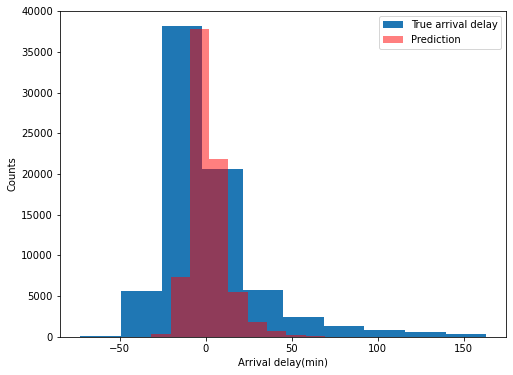

In [73]:
# Better plot for random forest regression
y_pred_rf = rf_trained.predict(X_vali_std_10)
plt.figure(figsize=(8,6))
plt.hist(y_vali, label='True arrival delay')
plt.hist(y_pred_rf, color='red', alpha=0.5, label='Prediction')
plt.xlabel('Arrival delay(min)')
plt.ylabel('Counts')
plt.legend()
plt.show()

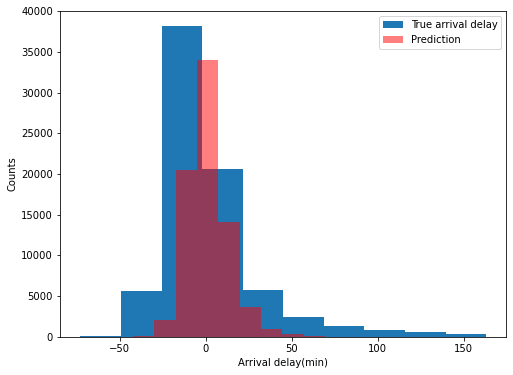

In [83]:
# Better plot for XGBoost regression
y_pred_xgb = xgb_trained.predict(X_vali_std_10)
plt.figure(figsize=(8,6))
plt.hist(y_vali, label='True arrival delay')
plt.hist(y_pred_xgb, color='red', alpha=0.5, label='Prediction')
plt.xlabel('Arrival delay(min)')
plt.ylabel('Counts')
plt.legend()
plt.show()

## Predicting testing data

In [84]:
df_test.columns

Index(['distance', 'numflights', 'numstrikes', 'strikeprob', 'percentflights',
       'region_N', 'region_O', 'region_S', 'region_W', 'man_Airbus',
       'man_American Champion Aircraft', 'man_Bell Helicopter Textron Canada',
       'man_Boeing', 'man_Bombardier', 'man_Canadair', 'man_Eads/alenia Atr',
       'man_Embraer', 'man_Grumman', 'man_Mcdonnell Douglas', 'man_Piper',
       'aircraft_age', 'type_large_airport', 'type_medium_airport',
       'type_small_airport', 'date', 'weekday', 'sin_weekday', 'cos_weekday',
       'crs_dep_time_hour', 'crs_dep_time_min', 'sin_crs_dep_time',
       'cos_crs_dep_time', 'crs_arr_time_hour', 'crs_arr_time_min',
       'sin_crs_arr_time', 'cos_crs_arr_time', 'DelayD_carrier',
       'num_flights_carrier', 'DelayD_origin', 'num_flights_origin',
       'DelayD_dest', 'num_flights_dest', 'DelayA_carrier', 'DelayA_origin',
       'DelayA_dest', 'DelayA_hourly', 'num_flights_hourly', 'DelayD_hourly',
       'DelayA_origin_hourly', 'DelayA_carrier_ho

In [165]:
X_test = df_test.copy()

In [172]:
X_test_std = standardize(X_test)

X_test_std_10 = X_test_std[top10_features]

In [173]:
X_test_std_10 = X_test_std_10.fillna(X_test_std_10[['DelayD_origin', 'DelayD_dest']].mean())

In [175]:
y_pred_test = rf_trained.predict(X_test_std_10)

In [182]:
df_test = df_test.fillna(df_test.mean())

In [187]:
df_test = df_test[top10_features]

In [188]:
df_test['predicted_delay'] = y_pred_test

<ipython-input-188-4313c3c03a05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predicted_delay'] = y_pred_test


In [191]:
df_test.to_csv('submission.csv', index=None)